# 1. Model Architecture Summary

### Model 1: GRU-based network with 64 units and dense layers. The model is trained to predict measured_y, measured_z, and theta based on trap positions.
### Model 2: LSTM-based network with 64 units and dense layers. A custom loss function is defined to minimize the deviation between the predicted and actual reference positions by incorporating predictions from Model 1.

# 2. Key Metrics

### Model 1:
        Training Time: X seconds
        Inference Time: Y seconds per sample
        R-Squared: Z
        MSE: A
        MAE: B

# 3. Loss Evolution

## Plots showcasing the evolution of training and validation loss during training for both models.
### Model 1: Training vs. Validation Loss
### Model 2: Training vs. Validation Loss with custom loss function

# 4. Prediction Comparisons

### Model 1 Predictions:
#### Comparison of predicted and actual positions for measured_y, measured_z, and theta.
#### Scatter plots and reference comparisons.
### Model 2 Predictions:
#### Comparison of predicted reference positions (using traps_y, traps_z) against actual reference positions.

# 5. Visualization of Results


Import required libraries for data handling, preprocessing, neural network creation, and visualization

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [2]:
# data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/new_concatenated_data_7_theta.csv')
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')



In [3]:
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

input_train_scaled = scaler1.fit_transform(input_train)
output_train_scaled = scaler1.transform(output_train)

input_train_scaled = input_train_scaled.reshape((input_train_scaled.shape[0], 1, input_train_scaled.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(input_train_scaled, output_train_scaled, test_size=0.15, random_state=42)


indices = np.arange(input_train.shape[0])

X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train_scaled, output_train_scaled, indices, test_size=0.30, random_state=42)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

model1.compile(loss='mean_squared_error', optimizer='adam')

early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

start_time_training = time.time()
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()


Epoch 1/700
195/195 [==============================] - 4s 6ms/step - loss: 0.2461 - val_loss: 0.0025
Epoch 2/700
195/195 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 6.5190e-04
Epoch 3/700
195/195 [==============================] - 1s 4ms/step - loss: 5.1643e-04 - val_loss: 3.9868e-04
Epoch 4/700
195/195 [==============================] - 1s 4ms/step - loss: 3.5650e-04 - val_loss: 3.0998e-04
Epoch 5/700
195/195 [==============================] - 1s 4ms/step - loss: 2.7827e-04 - val_loss: 2.4267e-04
Epoch 6/700
195/195 [==============================] - 1s 4ms/step - loss: 2.2962e-04 - val_loss: 2.0286e-04
Epoch 7/700
195/195 [==============================] - 1s 4ms/step - loss: 1.9546e-04 - val_loss: 1.7967e-04
Epoch 8/700
195/195 [==============================] - 1s 4ms/step - loss: 1.7207e-04 - val_loss: 1.5560e-04
Epoch 9/700
195/195 [==============================] - 1s 4ms/step - loss: 1.5128e-04 - val_loss: 1.2290e-04
Epoch 10/700
195/195 [=========

In [4]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 107.17 seconds
Inference Time: 0.6831 seconds per sample


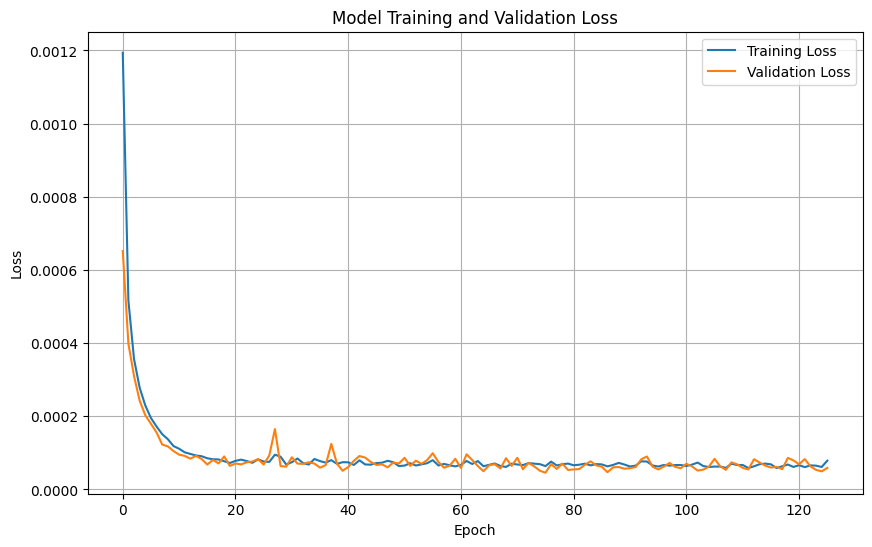

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss.png',format='png')
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.037018305145301e-05
Mean Absolute Error: 0.004716124857811092
R-squared: 0.9999485358198924


# 

In [7]:
predictions_inverse_scaled = scaler1.inverse_transform(predictions)
predictions_df = pd.DataFrame(predictions_inverse_scaled)
predictions_df


,0,1,2
0,-39.196957,102.504791,2.711571
1,-41.730286,111.907623,2.961730
2,-26.088213,120.523048,4.749309
3,35.294792,132.911438,0.376425
4,-17.083496,111.784447,4.948600
...,...,...,...
2962,27.201418,138.762054,0.575562
2963,-26.627298,121.123970,4.735209
2964,40.752762,113.822739,6.143906
2965,-34.798096,113.218658,1.714733


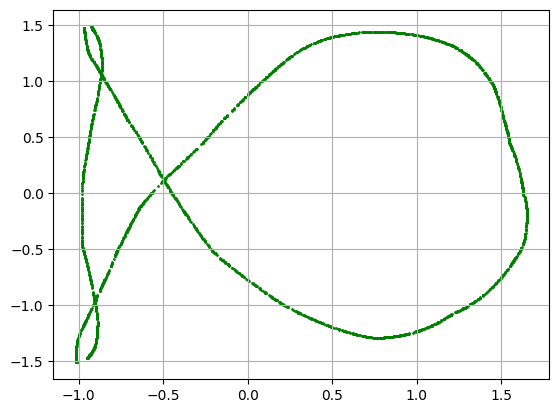

In [8]:
predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']
plt.scatter(predictions[:,0], predictions[:,1], color='green', label = 'Predicted traps', s=1)
plt.grid()

In [9]:
# bead_x = data.loc[test_indices, 'bead_x'].values
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values


lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

,theta,measured_y,measured_z,traps_y,traps_z,reference_y,reference_z
0,2.711571,-39.196957,102.504791,-43.858305,103.682749,-43.841686,103.360943
1,2.961730,-41.730286,111.907623,-43.110879,112.076170,-42.775556,111.927768
2,4.749309,-26.088213,120.523048,-27.302437,117.937062,-28.508862,117.895477
3,0.376425,35.294792,132.911438,34.222157,133.354134,35.885862,133.557822
4,4.948600,-17.083496,111.784447,-17.635968,109.918091,-18.464252,109.732995
...,...,...,...,...,...,...,...
2962,0.575562,27.201418,138.762054,25.845103,138.351896,27.183214,138.653718
2963,4.735209,-26.627298,121.123970,-27.901015,118.520598,-29.128234,118.490183
2964,6.143906,40.752762,113.822739,39.792526,113.610067,41.502822,113.538425
2965,1.714733,-34.798096,113.218658,-33.884107,113.754279,-35.293491,113.652881


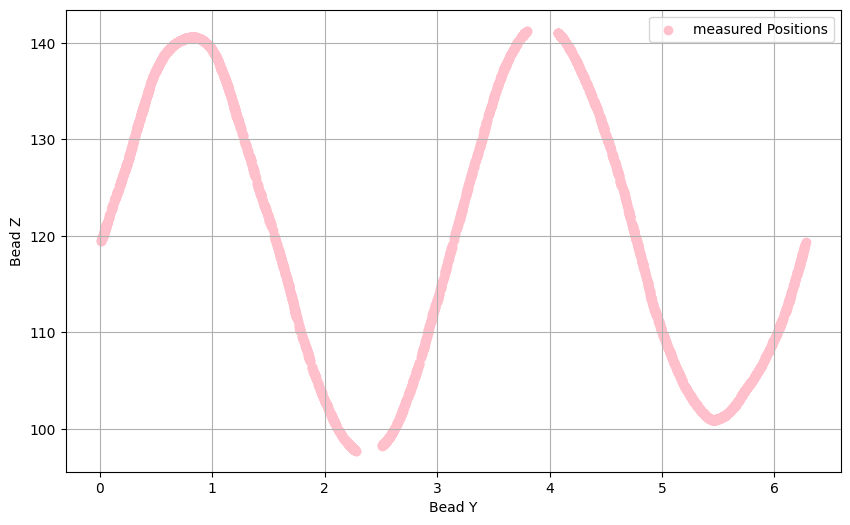

In [10]:

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
# plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label=' trap Positions', lw=1)
# plt.scatter(lookup_table['reference_y'], lookup_table['reference_z'], color='black', label=' simulated Positions')
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()
plt.show()

In [11]:
# theta_lookup=lookup_table.sort_values(by='theta')['theta'].reset_index(drop=True)


In [12]:
# lookup_table = lookup_table.sort_values(by='theta').reset_index(drop=True)
# lookup_table

In [13]:
# change of logic - include simulated_y and simulated_z

In [14]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values




input_scaler = StandardScaler()
output_scaler = StandardScaler()

input_nn2_scaled = input_scaler.fit_transform(input_nn2)
output_nn2_scaled = output_scaler.fit_transform(output_nn2)

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2_scaled.reshape((input_nn2_scaled.shape[0], 1, input_nn2_scaled.shape[1]))
output_scaled_nn2 = output_nn2_scaled


# Split the data into training and testing sets
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

# Custom cost function
def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)

    # Extract true simulated_y and simulat+ed_z from y_true
    true_simulated_positions = y_true_nn2[:, 2:5]

    # Calculate L1 norm (mean absolute error)
    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - true_simulated_positions), axis=1))  # Only consider y and z

    return deviation

# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model2.compile(loss=custom_cost_function, optimizer='adam')


start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()



Epoch 1/400
71/71 [==============================] - 6s 15ms/step - loss: 1.6666 - val_loss: 0.3170
Epoch 2/400
71/71 [==============================] - 0s 6ms/step - loss: 0.1639 - val_loss: 0.1096
Epoch 3/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0927 - val_loss: 0.0784
Epoch 4/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0724 - val_loss: 0.0595
Epoch 5/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0589 - val_loss: 0.0599
Epoch 6/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0598 - val_loss: 0.0492
Epoch 7/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0565
Epoch 8/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.0404
Epoch 9/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0454 - val_loss: 0.0512
Epoch 10/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0468 - val_loss: 0.0419
Epoch 11

71/71 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.0179
Epoch 84/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.0279
Epoch 85/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0158
Epoch 86/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0183
Epoch 87/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0204 - val_loss: 0.0235
Epoch 88/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0152
Epoch 89/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0173 - val_loss: 0.0199
Epoch 90/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0185 - val_loss: 0.0209
Epoch 91/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.0251
Epoch 92/400
71/71 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.0228
Epoch 93/400


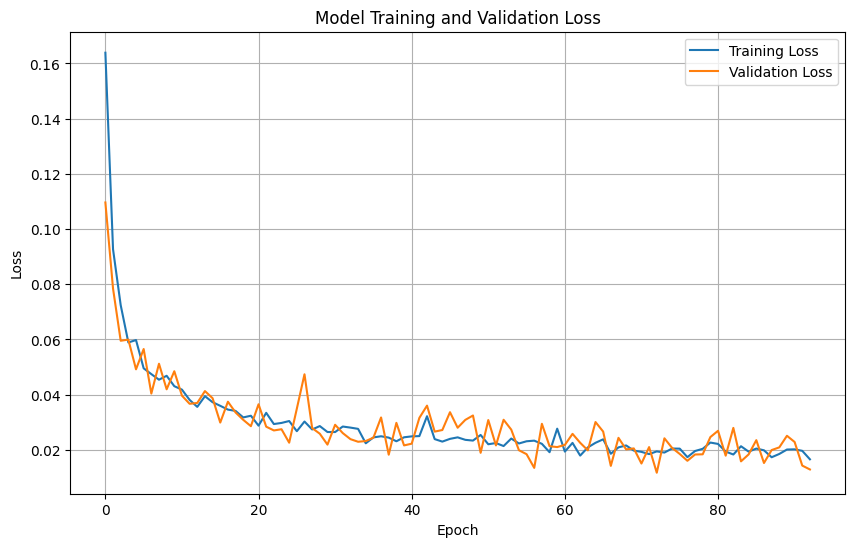

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss.png',format='png')
plt.show()


In [16]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 44.59 seconds
Inference Time: 0.4787 seconds per sample


In [17]:
history = model2.fit(X_train_nn2, y_train_nn2, epochs=200, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
y_pred_nn2 = model2.predict(X_test_nn2)


Epoch 1/200
71/71 [==============================] - 1s 8ms/step - loss: 0.0184 - val_loss: 0.0253
Epoch 2/200
71/71 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.0181
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.0137
Epoch 4/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0146
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0236
Epoch 6/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0247 - val_loss: 0.0269
Epoch 7/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 8/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0151
Epoch 9/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0223
Epoch 10/200
71/71 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0172
Epoch 11/

In [18]:
np.save('y_test_nn2_baselinescaled.npy', y_test_nn2)
np.save('y_pred_nn2_baselinescaled.npy', y_pred_nn2_inverse) 

NameError: name 'y_pred_nn2_inverse' is not defined

In [ ]:
y_test_nn2.shape

In [19]:
y_pred_nn2_inverse = output_scaler.inverse_transform(y_pred_nn2)
y_pred_nn2_inverse = pd.DataFrame(y_pred_nn2_inverse)
y_pred_nn2_inverse

,0,1,2,3,4
0,38.806465,111.651291,-24.756796,122.273140,6.104593
1,-16.865242,131.729370,-17.618906,125.749283,1.296063
2,-45.259991,109.849709,-14.531735,122.750122,2.912012
3,-50.250446,134.885010,-13.597005,126.093346,3.569461
4,-3.028890,98.536186,-20.586807,120.803352,5.257229
...,...,...,...,...,...
441,-41.617092,127.013680,-14.412937,124.718559,4.477601
442,-29.323582,113.630356,-15.619973,122.458778,4.857964
443,-48.238605,137.578400,-14.561930,126.523842,4.033834
444,40.924107,120.474930,-32.626259,124.620735,0.031404


In [20]:
y_test_nn2_inverse = output_scaler.inverse_transform(y_test_nn2)
y_test_nn2_inverse = pd.DataFrame(y_test_nn2_inverse)
y_test_nn2_inverse

,0,1,2,3,4
0,39.241447,112.241908,40.957070,112.152278,6.111112
1,-15.134676,130.574252,-15.854385,130.787202,1.289858
2,-43.277323,109.577083,-43.001112,109.377644,2.899647
3,-43.952020,135.890267,-43.989958,136.228503,3.598088
4,-1.365936,101.360826,-1.430262,101.044919,5.233273
...,...,...,...,...,...
441,-37.427995,129.636126,-38.906187,129.838140,4.456771
442,-25.657042,116.390077,-26.804490,116.319358,4.788031
443,-43.408839,139.072810,-44.598105,139.492754,4.093174
444,40.771090,120.375449,42.472301,120.387245,0.035015


Predictions: [[ 1.5641549  -0.5514696  -0.43238938  0.18010245  1.5920496 ]
 [-0.19452588  0.8379125  -0.21339098  0.4163338  -0.915664  ]
 [-1.0915219  -0.6761373  -0.11867319  0.21251726 -0.07292464]
 [-1.2491714   1.0562795  -0.08999461  0.43971592  0.26994377]
 [ 0.24256736 -1.4590212  -0.30444947  0.08021906  1.1501378 ]]
Actual Outputs: [[ 1.57789608 -0.51059956  1.58378476 -0.50768971  1.59544928]
 [-0.13985694  0.75797932 -0.15925353  0.7587002  -0.91890021]
 [-1.02888901 -0.69500261 -0.99214515 -0.69624794 -0.07937338]
 [-1.05020281  1.12584193 -1.02248406  1.12847948  0.284873  ]
 [ 0.29510042 -1.26355898  0.28329451 -1.26252224  1.13764424]]


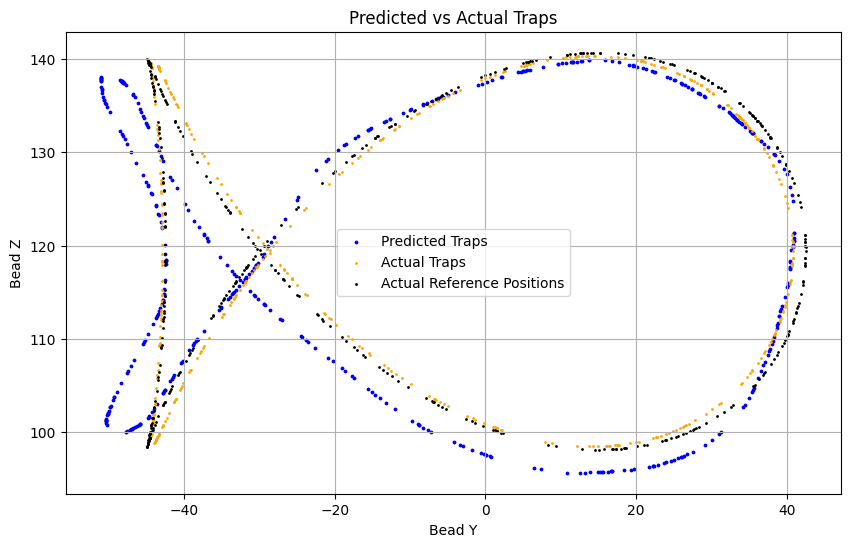

In [21]:
# Predict on the test set
# predictions_nn2 = model2.predict(X_test)

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2_inverse[0], y_pred_nn2_inverse[1], color='blue', label='Predicted Traps', s=3)
plt.scatter(y_test_nn2_inverse[0], y_test_nn2_inverse[1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2_inverse[2], y_test_nn2_inverse[3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='Measured Positions from Model1')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [22]:
y_pred_nn2_sort_theta = y_pred_nn2[y_pred_nn2[:, -1].argsort()]

In [23]:
y_pred_nn2_inverse_sorted = y_pred_nn2_inverse.sort_values(by=y_pred_nn2_inverse.columns[-1])

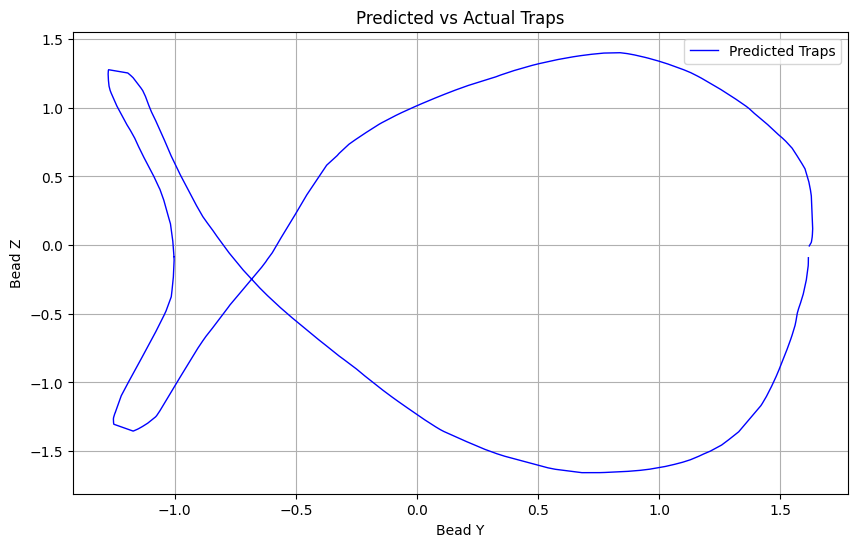

In [24]:

# Plot the predictions as line plot after sorting by theta
plt.figure(figsize=(10, 6))
plt.plot(y_pred_nn2_sort_theta[:, 0], y_pred_nn2_sort_theta[:, 1], color='blue', label='Predicted Traps', lw=1)
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
# plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()


In [25]:
input_for_model1 = np.concatenate([y_pred_nn2_sort_theta[:, 0:2], y_pred_nn2_sort_theta[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

14/14 [==============================] - 0s 3ms/step


array([[ 1.6104711 , -0.00318385, -1.5796527 ],
       [ 1.6168572 ,  0.01843676, -1.5762357 ],
       [ 1.6174258 ,  0.02451326, -1.5751519 ],
       ...,
       [ 1.6236137 , -0.11483206,  1.6575282 ],
       [ 1.6193877 , -0.07977167,  1.6631502 ],
       [ 1.6191636 , -0.07838029,  1.6632946 ]], dtype=float32)

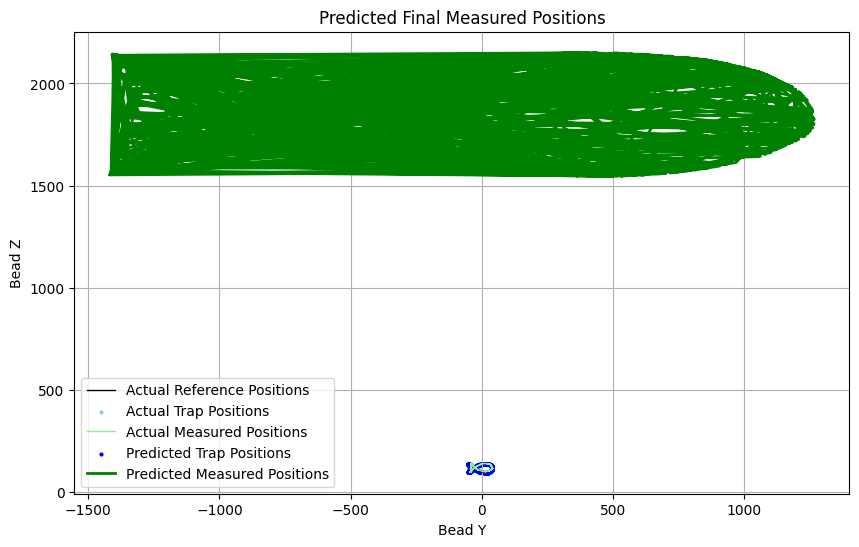

In [34]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')
plt.plot(data['reference_y'], data['reference_z'], color='black', label='Actual Reference Positions',lw=1)

plt.scatter(y_test_nn2_inverse[0], y_test_nn2_inverse[1], color='skyblue', label='Actual Trap Positions',s=4)
plt.plot(data['measured_y'],data['measured_z'], color= 'lightgreen', label='Actual Measured Positions', lw=1)

plt.scatter(y_pred_nn2_inverse_sorted[0], y_pred_nn2_inverse_sorted[1], color='blue', label='Predicted Trap Positions', s=4)
plt.plot(final_predictionsdf['measured_y'], final_predictionsdf['measured_z'], color='green', label='Predicted Measured Positions',lw=2)

plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.01105456173370342
Mean Absolute Error: 0.07527737033483216
R-squared: 0.9889054454865455


In [20]:
y_test_nn2.shape

(594, 5)

In [29]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

14/14 [==============================] - 0s 3ms/step


array([[ 1.5904769 , -0.5193202 ,  1.5889816 ],
       [-0.16294022,  0.7604981 , -0.9194569 ],
       [-0.9947294 , -0.68110675, -0.07815811],
       ...,
       [-1.0431772 ,  1.3600649 ,  0.5301667 ],
       [ 1.6184137 ,  0.05345529, -1.5701132 ],
       [ 1.5538669 , -0.6389985 ,  1.562321  ]], dtype=float32)

In [30]:
final_predictions.shape

(446, 3)

In [31]:
final_predictions = scaler1.inverse_transform(final_predictions)
final_predictions_measured = pd.DataFrame(final_predictions)
final_predictions_measured

,0,1,2
0,39.285759,112.155754,6.128486
1,-16.232218,130.688400,1.326818
2,-42.568935,109.812973,2.937237
3,-43.444603,136.080582,3.615914
4,-1.951680,101.380531,5.259987
...,...,...,...
441,-38.482502,129.772461,4.478774
442,-26.735130,116.420914,4.809085
443,-44.102928,139.370529,4.101696
444,40.170315,120.449936,0.081329


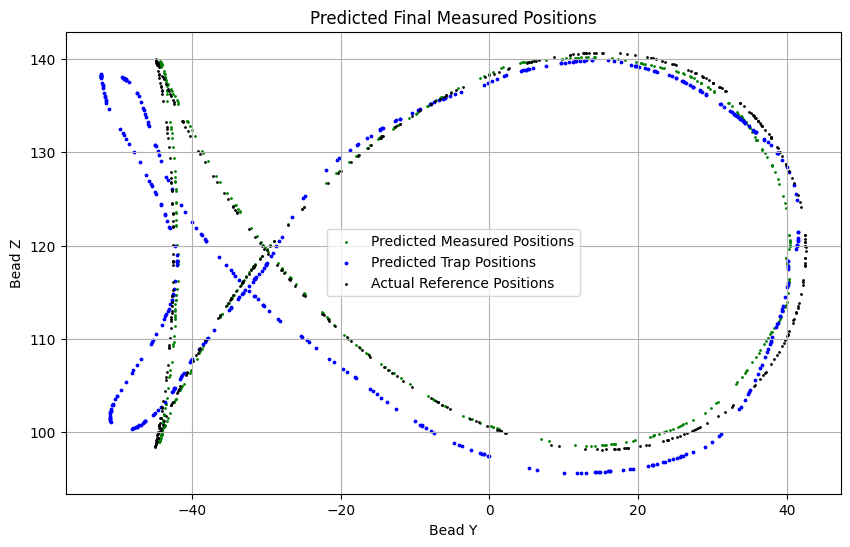

In [83]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictionsdf['measured_y'], final_predictionsdf['measured_z'], color='green', label='Predicted Measured Positions',s=1)
plt.scatter(y_pred_nn2_inverse[0], y_pred_nn2_inverse[1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2_inverse[2], y_test_nn2_inverse[3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

In [32]:
final_predictions_inverse = scaler1.inverse_transform(final_predictions)
final_predictionsdf = pd.DataFrame(final_predictions_inverse)
final_predictionsdf


,0,1,2
0,1232.821411,1743.767700,14.818029
1,-525.029419,2012.133057,5.626651
2,-1358.921997,1709.842651,8.709324
3,-1386.647949,2090.215576,10.008451
4,-72.868622,1587.735229,13.155545
...,...,...,...
441,-1229.534302,1998.869629,11.660143
442,-857.580383,1805.530151,12.292425
443,-1407.492432,2137.856201,10.938337
444,1260.828857,1863.873169,3.242528


In [33]:
final_predictionsdf.columns = ['0','1','2']  # Clear any existing column names
final_predictionsdf.columns = [ 'measured_y', 'measured_z','theta']

In [37]:

# Sort final predictions by theta
final_predictions_sorted = final_predictionsdf.sort_values(by=['theta','measured_y','measured_z'], ascending=True)
final_predictions_sorted

,measured_y,measured_z,theta
0,40.359028,119.788177,0.072364
1,40.350716,119.995071,0.073651
2,40.339748,120.045929,0.074020
3,40.280014,120.367577,0.077615
4,40.222279,120.701607,0.083216
...,...,...,...
589,40.250999,118.100227,6.288248
590,40.164711,118.549248,6.297812
591,40.126579,118.703415,6.300732
592,40.047653,118.930542,6.303828


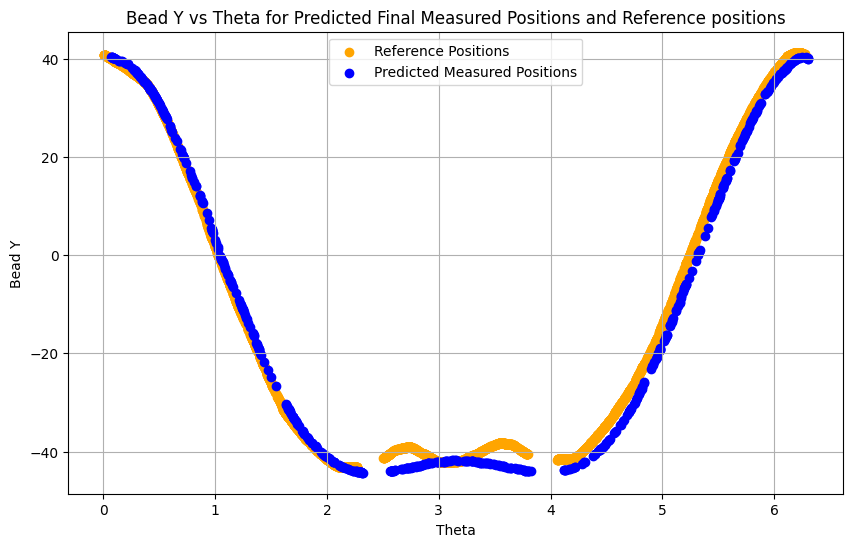

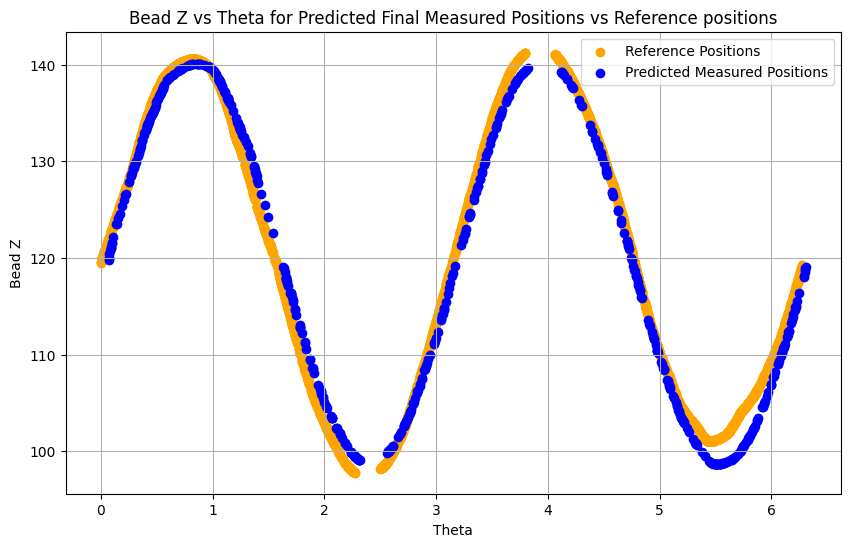

In [39]:

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_y'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.title('Bead Y vs Theta for Predicted Final Measured Positions and Reference positions')
plt.savefig('BeadYtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.title('Bead Z vs Theta for Predicted Final Measured Positions vs Reference positions')
plt.savefig('BeadZtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


In [26]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')
# plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Original simulated Positions')
plt.scatter(final_predictionsdf[ 0], final_predictionsdf[ 1], color='green', label='Predicted measured Positions')
# plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label='Predicted trap Positions', s=1)

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()
plt.show()

In [27]:
# model2.save('model2_baseline_scaled.keras')

In [28]:
# model1.save('model1_baseline_scaled.keras')

In [19]:
Baselinescaled = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('baseline_scaled.npy', Baselinescaled)